In [1]:
import pandas as pd
import plotly.graph_objects as go


In [2]:
def fetch_data(kw):
    dir = '/media/johnattan/LaCie/Twitter_Terms/' + kw + '/GEO-Tweets.csv'
    df = pd.read_csv(dir, index_col=None, header=0)
    df = df.drop(labels = ['Unnamed: 0', 'Unnamed: 0.1', 'id'], axis = 1)

    return df

df_alcohol = fetch_data('ALCOHOL')
df_beer = fetch_data('BEER')
df_wine = fetch_data('WINE')
df_drink = fetch_data('DRINKING')
df_liquor = fetch_data('LIQUOR')

In [3]:
print(df_beer.text[0])
print(df_beer.shape)

Hey! Free beer with proof of covid vax. Just lovely. https://t.co/dE6OsDS0OO
(35212, 3)


In [4]:
state_data = pd.read_csv('2019_Census_US_Population_Data_By_State_Lat_Long.csv')
state_data

,STATE,POPESTIMATE2019,lat,long
0,AL,4903185,32.377716,-86.300568
1,AK,731545,58.301598,-134.420212
2,AZ,7278717,33.448143,-112.096962
3,AR,3017804,34.746613,-92.288986
4,CA,39512223,38.576668,-121.493629
5,CO,5758736,39.739227,-104.984856
6,CT,3565287,41.764046,-72.682198
7,DC,705749,38.895110,-77.036370
8,DE,973764,39.157307,-75.519722
9,FL,21477737,30.438118,-84.281296


# Parse Keyword Dataframes for Geolocated Data

In [5]:
df_beer[df_beer.state == 'TX'].head()

,text,created_at,state
11,I’ve already seen an x-ray of the next corona ...,2021-04-01 01:17:52+00:00,TX
12,I’ve already seen an x-ray of the next corona ...,2021-04-01 01:18:01+00:00,TX
27,Can't wait for covid to be over so I can go ba...,2021-04-01 05:57:31+00:00,TX
28,"@hrkbenowen Yes, we all know plenty of mouth-b...",2021-04-01 09:55:41+00:00,TX
31,Beers with the bestie in the hottub after work...,2021-04-01 12:03:09+00:00,TX


In [6]:
cts_alcohol = df_alcohol.state.value_counts()
cts_beer = df_beer.state.value_counts()
cts_wine = df_wine.state.value_counts()
cts_drink = df_drink.state.value_counts()
cts_liquor = df_liquor.state.value_counts()
cts_liquor['DC'] = 0

In [16]:
state_counts = pd.DataFrame([])
state_pop = state_data.POPESTIMATE2019.values

state_counts['State'] = cts_beer.sort_index().index

state_counts['Alcohol'] = cts_alcohol.sort_index().values #/ state_pop
state_counts['Beer'] = cts_beer.sort_index().values #/ state_pop
state_counts['Wine'] = cts_wine.sort_index().values #/ state_pop
state_counts['Drink'] = cts_drink.sort_index().values #/ state_pop
state_counts['Liquor'] = cts_liquor.sort_index().values #/ state_pop

In [17]:
def plot_choropleth(kw):
    
    fig = go.Figure(data=go.Choropleth(
        locations=state_counts['State'], # Spatial coordinates
        z = state_counts[kw],#.astype(float), # Data to be color-coded
        locationmode = 'USA-states', # set of locations match entries in `locations`
        colorscale = 'Reds',
        colorbar_title = "Tweet Counts / Capita",
    ))

    fig.update_layout(
        title_text = 'Tweets related to Covid-19 and ' + kw,
        geo_scope='usa', # limite map scope to USA
    )
    fig.show()

state_counts = state_counts[state_counts['State'] != 'DC']

state_counts.head()

,State,Alcohol,Beer,Wine,Drink,Liquor
0,AK,47,100,85,44,11
1,AL,183,289,278,139,19
2,AR,88,192,168,84,17
3,AZ,374,758,731,425,96
4,CA,2113,4484,5614,2459,252


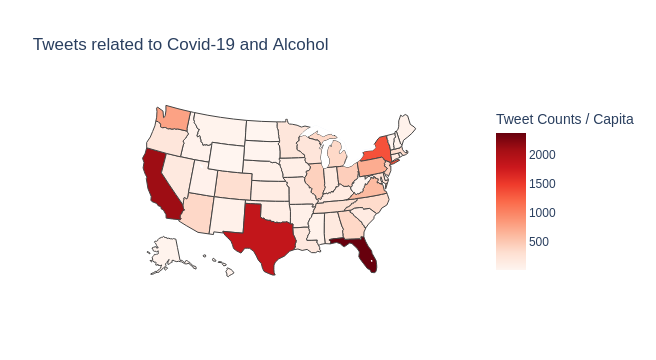

In [18]:
plot_choropleth('Alcohol')

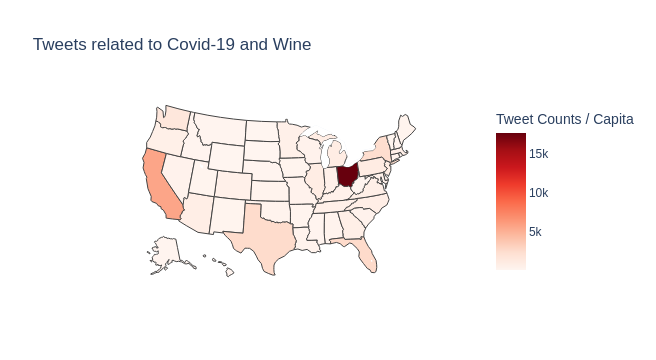

In [19]:
plot_choropleth('Wine')

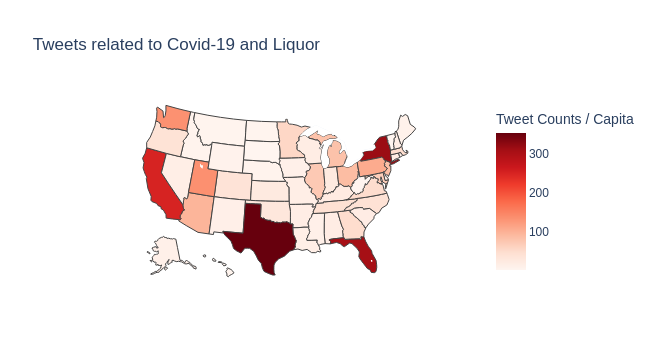

In [20]:
plot_choropleth('Liquor')

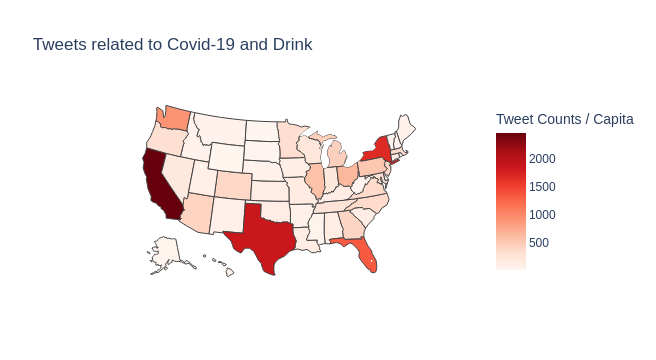

In [21]:
plot_choropleth('Drink')